In [1]:
#recalling packages from library
library(twitteR)
 library(ROAuth)
 library(RCurl)
library(tm)
library(httr)
library(curl)
library(SnowballC)
library(wordcloud)
library(reshape)
library(ggplot2)
library(dplyr)
library(tidytext)

Loading required package: bitops
Loading required package: NLP

Attaching package: ‘httr’

The following object is masked from ‘package:NLP’:

    content


Attaching package: ‘curl’

The following object is masked from ‘package:httr’:

    handle_reset

Loading required package: RColorBrewer


In [2]:
#setting API connection 
api_key <- "Rw3RnZbfHalmdDAYTMqQ6YSc2"
api_secret <-"UOnERcMNQ0sk3ObugtetYOtWygwGhuSMCYmxMRGiG1lE1nvuUL"
access_token <- "39695155-iSYZqudk0DfOo0BBJsZofye6pNwxGfx76eQSp02YV"
access_token_secret <-"ad0Hff0rqVPDTUtPOd011pn4rnf43EvZZz8ZZSrKeCp4c"

In [3]:
setup_twitter_oauth(api_key,api_secret,access_token, access_token_secret)

[1] "Using direct authentication"


In [4]:
 tweets <- searchTwitter('#MPElection2018', n=1500, lang="en", since=NULL, until=NULL, retryOnRateLimit=10)

Warning message in doRppAPICall("search/tweets", n, params = params, retryOnRateLimit = retryOnRateLimit, :
“1500 tweets were requested but the API can only return 791”

In [5]:
tweets.df <- twListToDF(tweets)

In [6]:
a<-tweets.df$text

In [7]:
#To remove non-ASCII Characters

aas<- unlist(strsplit(a, split=", "))
nonAscIDX<- grep("aas", iconv(aas, "latin1", "ASCII", sub="aas"))
aa<- aas[ - nonAscIDX]

In [8]:
myCorpus<-Corpus(VectorSource(aa))

In [9]:
# to remove special characters and convert to lowercase 
toSpace <- content_transformer(function(x, pattern) {return (gsub(pattern," ",
 x))})

 myCorpus<- tm_map(myCorpus,toSpace,"[^[:graph:]]")
myCorpus<-tm_map(myCorpus,toSpace,"/")

myCorpus<-tm_map(myCorpus,toSpace,"@")

myCorpus<-tm_map(myCorpus,toSpace,"\\|")

 myCorpus <- tm_map(myCorpus, content_transformer(tolower))

Warning message in tm_map.SimpleCorpus(myCorpus, toSpace, "[^[:graph:]]"):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, toSpace, "/"):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, toSpace, "@"):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, toSpace, "\\|"):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, content_transformer(tolower)):
“transformation drops documents”

In [10]:
#To remove punctuation 

myCorpus <- tm_map(myCorpus, removePunctuation)

Warning message in tm_map.SimpleCorpus(myCorpus, removePunctuation):
“transformation drops documents”

In [11]:
#To remove numbers 

myCorpus <- tm_map(myCorpus, removeNumbers)

Warning message in tm_map.SimpleCorpus(myCorpus, removeNumbers):
“transformation drops documents”

In [12]:
# to remove URL 

removeURL <- function(x) gsub("http[[:alnum:]]*", "", x)
myCorpus <- tm_map(myCorpus, content_transformer(removeURL))

Warning message in tm_map.SimpleCorpus(myCorpus, content_transformer(removeURL)):
“transformation drops documents”

In [14]:
#To remove stopwords and certain other words 
mystopwords<-c(stopwords("english"),"mpelect","dostamcomrad","shivsbharat","rajasthanelect")
myCorpus <- tm_map(myCorpus, removeWords, mystopwords)

Warning message in tm_map.SimpleCorpus(myCorpus, removeWords, mystopwords):
“transformation drops documents”

In [15]:
# To stem document 
myCorpus <- tm_map(myCorpus, stemDocument)

Warning message in tm_map.SimpleCorpus(myCorpus, stemDocument):
“transformation drops documents”

In [16]:
# To strip white space 
myCorpus <- tm_map(myCorpus, stripWhitespace)

Warning message in tm_map.SimpleCorpus(myCorpus, stripWhitespace):
“transformation drops documents”

In [32]:
# to convert to matrix 
dtm<-DocumentTermMatrix(myCorpus)
m<-as.matrix(dtm)
n<-m[ !rowSums(m[,colnames(m)[(3:ncol(m))]]==0)==ncol(m)-2, ]

In [33]:
# to find out frequent words 

findFreqTerms(dtm,lowfreq=10)

[1] "mpelect"        "dostamcomrad"   "evm"            "elect"         
 [5] "result"         "vindhya"        "bjp"            "congress"      
 [9] "won"            "now"            "tco"            "seat"          
[13] "win"            "rajasthanelect" "will"           "vote"          
[17] "count"          "msrtweet"       "progress"       "slow"          
[21] "room"           "strong"         "fight"          "incindia"      
[25] "cong"           "lead"           "wait"           "amp"           
[29] "ind"            "rebel"          "bsp"            "reduc"         
[33] "complet"        "round"          "gajab"          "done"          
[37] "face"           "malwa"          "savor"          "close"         
[41] "poll"           "exit"           "exitpol"        "economictim"   
[45] "predict"

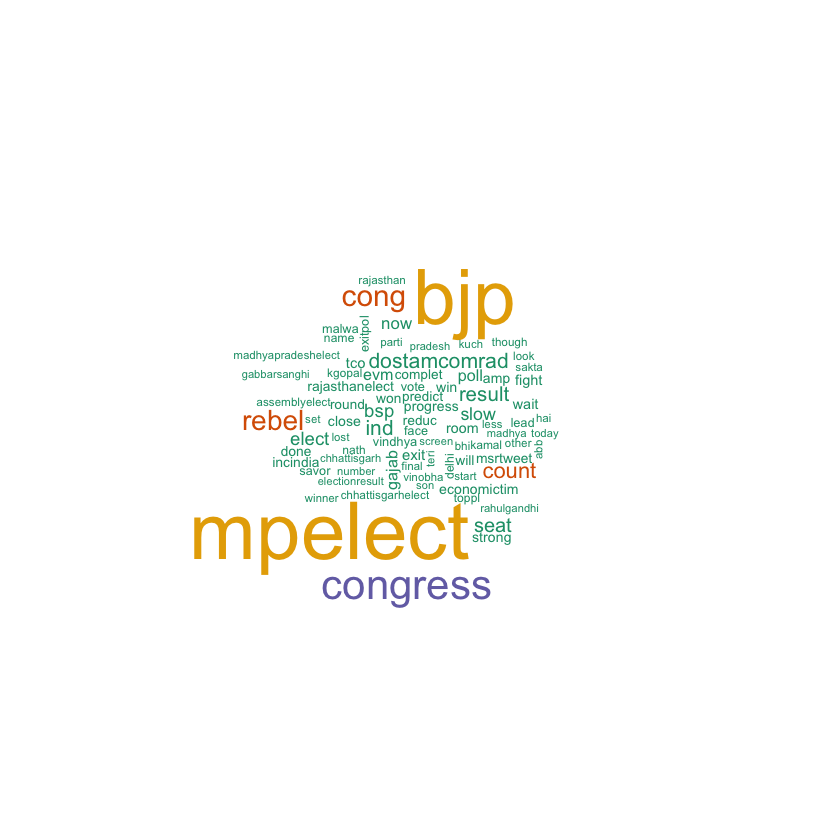

In [34]:
# for drawing word cloud 


set.seed(123)
freq <- sort(colSums(as.matrix(dtm)), decreasing=TRUE)
wordcloud(names(freq), freq, min.freq=5, colors=brewer.pal(6, "Dark2"))

In [35]:
setwd("~/desktop/GitHub/Twitter")

In [36]:
# For sensitivity analysis 

hu.liu.pos<-scan('p.txt',what='character')

hu.liu.neg<-scan('n.txt',what='character')

In [37]:
score.sentiment = function(sentences, pos.words, neg.words, .progress='none')
  {
    require(plyr);
    require(stringr);
    scores = laply(sentences, function(sentence, pos.words, neg.words) {
      sentence = gsub('[^A-z ]','', sentence)
      sentence = tolower(sentence);
      word.list = str_split(sentence, '\\s+');
      words = unlist(word.list);
      pos.matches = match(words, pos.words);
      neg.matches = match(words, neg.words);
      pos.matches = !is.na(pos.matches);
      neg.matches = !is.na(neg.matches);
      score = sum(pos.matches) - sum(neg.matches);
      return(score);
    }, pos.words, neg.words, .progress=.progress );
    scores.df = data.frame(score=scores, text=sentences);
    return(scores.df);
  }

In [26]:
result<-score.sentiment(tweets.df$text,hu.liu.pos,hu.liu.neg)
  
  result$score

Loading required package: plyr

Attaching package: ‘plyr’

The following objects are masked from ‘package:reshape’:

    rename, round_any

The following object is masked from ‘package:twitteR’:

    id

Loading required package: stringr


[1] -1  2  0 -1 -1  2  0 -1  0  1  1 -1 -1  1  1  0  0  0  0  2 -1  0  2  2  0
 [26]  0  1  0  0  0  0  0  0  1  0  0  0  2  0  0  0  1  1 -1  0 -1  0  1  0  0
 [51]  1  1  1  0 -2  1 -1 -2 -2  1  1  0  1  3  0 -2 -1  1  0  0  0 -2 -1  1 -2
 [76] -2 -1  0 -2  0  0  1  1  0 -2 -2  0  1 -2 -1  1  0  0  1  1  1  1  1  0 -2
[101]  1 -2  0  0 -2  0  1  1 -2  1  0  0 -1  1  1  1  0  1  0  1  1  0  1  0  1
[126]  1  0  0  1  1  0  0  1 -2  1 -1  1  0  1  1  1  0  1  1  1  1  0  1 -1  0
[151]  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  2  2  2  0 -1  0  0  0
[176]  0  0  0  0  0  0  0  0 -1 -2 -2  0  0  0  0  1  1  0 -1  0  0  1 -2  0  1
[201]  0  0  2  0  1  1 -2  1  0 -2 -2 -2 -1  0  0 -1  2  2  0  0  0  0 -1  1  0
[226] -2 -1 -1  0  0 -1 -1 -2 -1  0  0 -2  0 -2  0  0 -2 -2 -2 -1  1 -2  1 -2  0
[251]  0  0  0 -1 -2  0  0  0  0  0  0 -2  0  1  0  0  0  0  0  0  0 -2  0  0  0
[276]  0 -2  0  0  0 -2  0 -2  1 -2 -2 -2 -2 -2 -2 -2  0 -2  1 -2 -2 -2 -2 -2  0
[301] -1  3  1  0  2  1  2  1  1  0  2  0  0  2  0  0 -2  0 -1  0  0  0 -1 -1  2
[326]  1  0  0  1  0  0 -1  0  0  0  1  0  0  0 -1  0 -2  0  0  0  0 -1  0  2  1
[351]  2  0  1  0  0  0  0  2  2  2  0  2  2  0  2  2  2  2  2  2  2  2  1  0  0
[376]  0  0  0  0  0  0  0  0  0  1  0  1  1  0  0  0  1  1  2  0  0  1  1  1  0
[401]  0  1  0  0  1  0  0  0  0  1  0  0 -1  0  1  0  1  1  1  1  1 -3  0  0  0
[426]  0 -1  0  0  0  0  0  0  1  0  0  0  0 -1  0  2  0  0  0 -1  0  1 -1 -1 -1
[451] -1 -1  0 -1  0  0 -1 -1  0 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0
[476]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  2  2  0  0  0  0  0
[501]  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
[526]  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[551]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[576]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2
[601]  0  2  0  1  1  1  1  0  0  0  0  0  0 -1  0  0  0  0  0  0  3  0  0  0  0
[626]  0  0  0  0  0  0  1  0  0  0  1  1  1  0  1  1 -1  1 -1  3 -2  0  0  0  0
[651]  0  3  1  0  0  1  1  0  0  0  0  2  1  3  1  2  1  0  0 -1 -1  0 -1 -1 -1
[676] -1 -1  0 -1 -1 -1 -1  0  0  1 -1  0  0  0  0  2  1  0  0  0  0  1  0  0  0
[701]  0  2  0  1  2  0  0  0  0  0 -1  0  0  0  1  1  0  0  0  0  0  0  0  0  1
[726]  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  1  0  0  0
[751]  0  2  2  0  1 -1  2  1  0  2  2  2  2  2  0 -1  1  0  2  3 -1 -1  0  0 -1
[776]  0 -1  0 -1 -1 -1 -1 -1  0  0 -1  1 -1  1  1  0

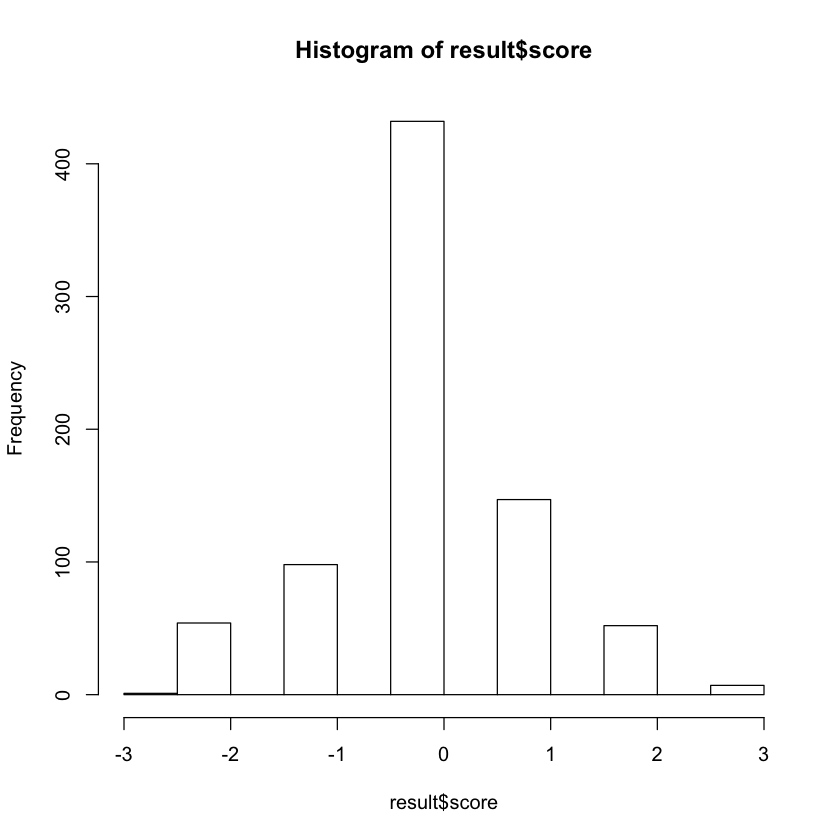

In [27]:
 hist(result$score)

In [70]:
terms<-Terms(dtm)

In [71]:
ap_td<-tidy(dtm)

In [72]:
ap_sentiments <- ap_td %>%
  inner_join(get_sentiments("bing"), by = c(term = "word"))
#ap_sentiments

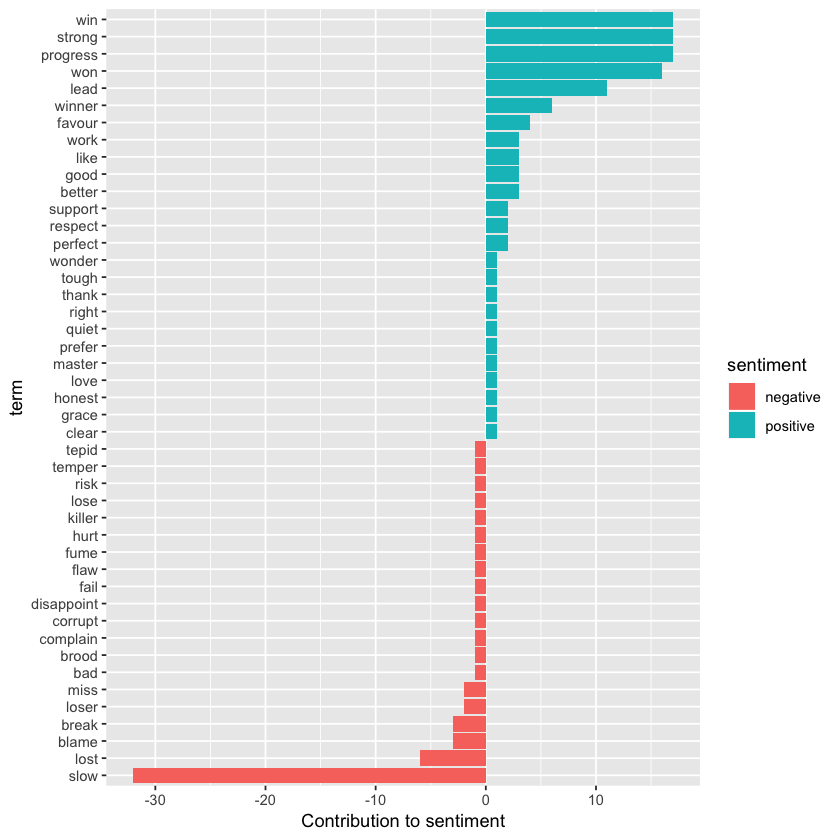

In [73]:
ap_sentiments %>%
  count(sentiment, term, wt = count) %>%
  ungroup() %>%
  filter(n >= 1) %>%
  mutate(n = ifelse(sentiment == "negative", -n, n)) %>%
  mutate(term = reorder(term, n)) %>%
  ggplot(aes(term, n, fill = sentiment)) +
  geom_bar(stat = "identity") +
  ylab("Contribution to sentiment") +
  coord_flip()

In [28]:
#Number of topics code 


library(topicmodels)
library(ldatuning)

In [38]:
result <- FindTopicsNumber(
  n,
  topics = seq(from = 2, to = 10, by = 1),
   metrics = c("Griffiths2004", "CaoJuan2009", "Arun2010", "Deveaud2014"),
  method = "Gibbs",
   control = list(seed = 77),
  mc.cores = 2L,
  verbose = TRUE
 )

fit models... done.
calculate metrics:
  Griffiths2004... done.
  CaoJuan2009... done.
  Arun2010... done.
  Deveaud2014... done.


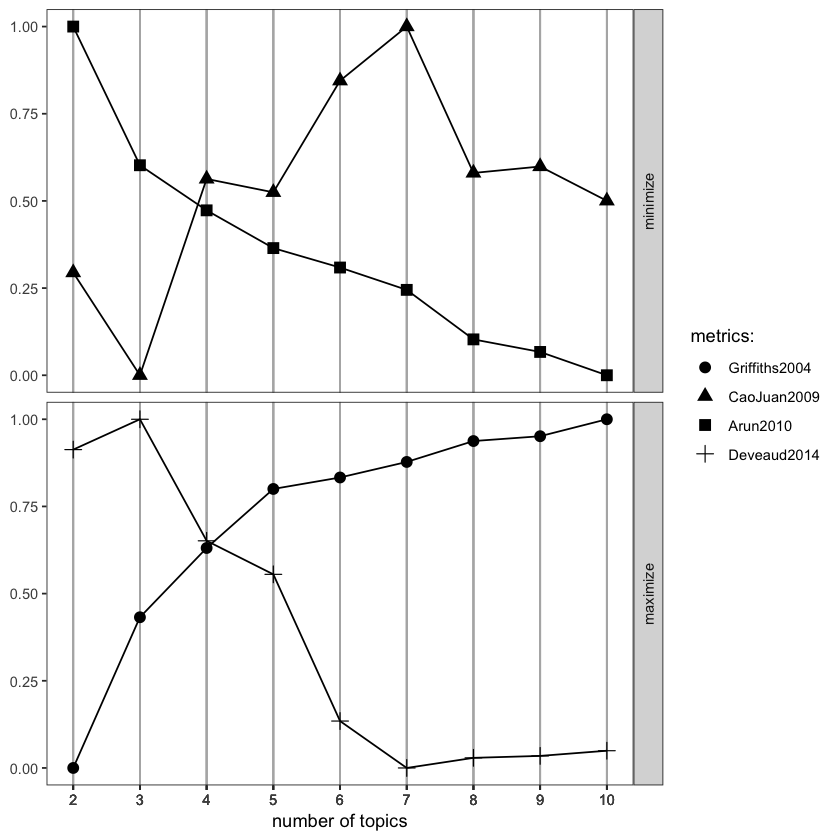

In [39]:
#Arun2010,Deveaud2014 maximize
#Griffiths2009, CaoJuan2009 minimize 


FindTopicsNumber_plot(result)

In [41]:
ap_lda <- LDA(n, k = 2, control = list(seed = 1234))

In [42]:

ap_topics <- tidy(ap_lda, matrix = "beta")

In [43]:
ap_top_terms <- ap_topics %>%
  group_by(topic) %>%
  top_n(10, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)


Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:reshape’:

    rename

The following objects are masked from ‘package:twitteR’:

    id, location

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



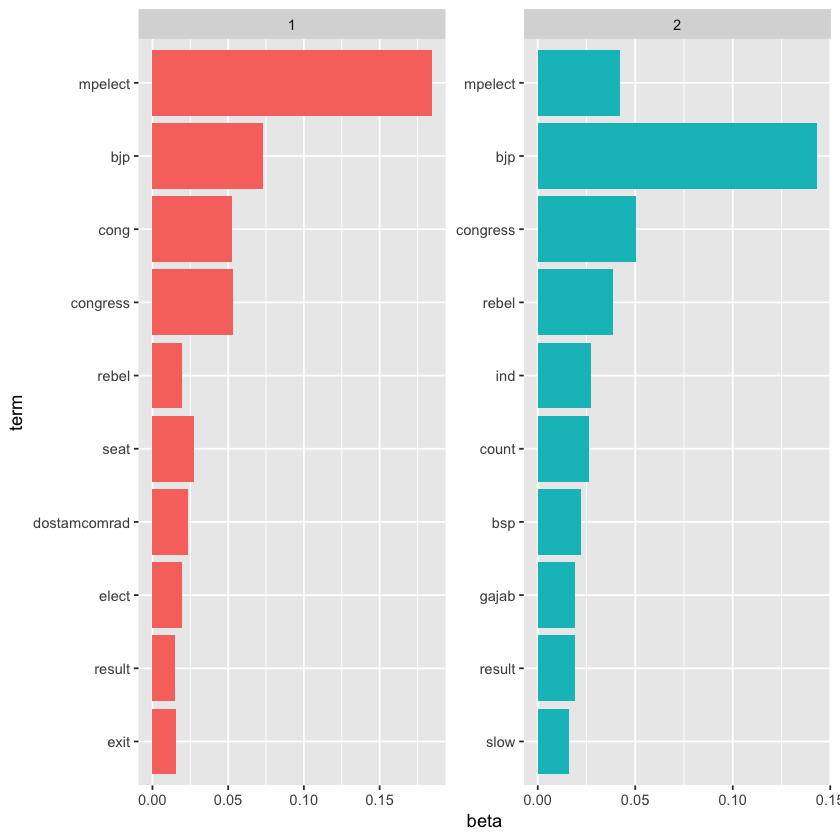

In [44]:
ap_top_terms %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip()